1. Uploading the libraries

In [27]:
# STAC access
import pystac_client
import planetary_computer


# dataframes
import pandas as pd

# xarrays
import xarray as xr

# library for turning STAC objects into xarrays
import stackstac

# visualization
from matplotlib import pyplot as plt

# library for generating animated gif
import geogif

# miscellanous
import numpy as np
from IPython.display import display
from datetime import date
import time

2. Connecting to a Planetary computer

In [28]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
    )

3. Defining the area of interest

In [29]:
#Coordinates of a Gironde area
aoi = [-1.362991,44.412202,-0.911865,44.674024]
#time_range
start_date='2022-07-01'
end_date='2022-08-15'
sat_coll=['sentinel-2-l2a']

4. Searching for satellite images

In [30]:
search = catalog.search(
    collections=sat_coll,
    datetime=f'{start_date}/{end_date}',
    bbox=aoi
)
items = search.item_collection()
print(f"{len(items)} items found with the `bbox` parameter")

9 items found with the `bbox` parameter


5. Selected images in a time range 

In [5]:
for img in items:
    print(img.id, img.datetime)

S2A_MSIL2A_20220811T105631_R094_T30TXQ_20220812T083926 2022-08-11 10:56:31.024000+00:00
S2B_MSIL2A_20220806T105629_R094_T30TXQ_20220807T145232 2022-08-06 10:56:29.024000+00:00
S2A_MSIL2A_20220801T105631_R094_T30TXQ_20220802T084538 2022-08-01 10:56:31.024000+00:00
S2B_MSIL2A_20220727T105629_R094_T30TXQ_20220728T202033 2022-07-27 10:56:29.024000+00:00
S2A_MSIL2A_20220722T105631_R094_T30TXQ_20220724T151420 2022-07-22 10:56:31.024000+00:00
S2B_MSIL2A_20220717T105629_R094_T30TXQ_20220717T221052 2022-07-17 10:56:29.024000+00:00
S2A_MSIL2A_20220712T105631_R094_T30TXQ_20220713T225842 2022-07-12 10:56:31.024000+00:00
S2B_MSIL2A_20220707T105629_R094_T30TXQ_20220708T074513 2022-07-07 10:56:29.024000+00:00
S2A_MSIL2A_20220702T105631_R094_T30TXQ_20220703T002221 2022-07-02 10:56:31.024000+00:00


6. Creating a Data Cube for a fire in Landiras forests

In [31]:
bands = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B11', 'B12', 'SCL']
FILL_VALUE = 2**16-1
array = stackstac.stack(
                    items,
                    assets = bands,
                    resolution=10,
                    dtype="uint16",
                    fill_value=FILL_VALUE,
                    bounds_latlon=[-0.9750285970655596,44.44689686136784,-0.23070492986833424,44.653393290190074],#aoi_bounds,
#                    chunksize= (time_steps_pc, 1, 'auto', 'auto')
                    )
array

/srv/conda/envs/notebook/lib/python3.11/site-packages/stackstac/prepare.py:363: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-f3bda51bdd4eab8072cbb75559459cde' (time: 9,
                                                                band: 10,
                                                                y: 2468, x: 5981)>
dask.array<fetch_raster_window, shape=(9, 10, 2468, 5981), dtype=uint16, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/44)
  * time                                     (time) datetime64[ns] 2022-07-02...
    id                                       (time) <U54 'S2A_MSIL2A_20220702...
  * band                                     (band) <U3 'B02' 'B03' ... 'SCL'
  * x                                        (x) float64 6.606e+05 ... 7.204e+05
  * y                                        (y) float64 4.948e+06 ... 4.924e+06
    s2:mean_solar_azimuth                    (time) float64 145.9 ... 151.8
    ...                                       ...
    proj:bbox                                object {600000.0, 5000040.0, 489...
    gsd                                      (band) float64 10.0 10.0 ... 20.0
    common_name                              (band) object 'blue' ... None
    center_wavelength                        (band) object 0.49 0.56 ... None
    full_width_half_max                      (band) object 0.098 0.045 ... None
    epsg                                     int64 32630
Attributes:
    spec:        RasterSpec(epsg=32630, bounds=(660550, 4923500, 720360, 4948...
    crs:         epsg:32630
    transform:   | 10.00, 0.00, 660550.00|\n| 0.00,-10.00, 4948180.00|\n| 0.0...
    resolution:  10

7. Slicing a data cube - before and after the fire

In [32]:
sub_cube_before = array.sel(x=slice(None,None), y=slice(None,None), band = ['B02', 'B03', 'B04','B08', 'B11', 'B12'], time= ['2022-07-12 10:56:31.024000'] )
sub_cube_before

<xarray.DataArray 'stackstac-f3bda51bdd4eab8072cbb75559459cde' (time: 1,
                                                                band: 6,
                                                                y: 2468, x: 5981)>
dask.array<getitem, shape=(1, 6, 2468, 5981), dtype=uint16, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/44)
  * time                                     (time) datetime64[ns] 2022-07-12...
    id                                       (time) <U54 'S2A_MSIL2A_20220712...
  * band                                     (band) <U3 'B02' 'B03' ... 'B12'
  * x                                        (x) float64 6.606e+05 ... 7.204e+05
  * y                                        (y) float64 4.948e+06 ... 4.924e+06
    s2:mean_solar_azimuth                    (time) float64 146.2
    ...                                       ...
    proj:bbox                                object {600000.0, 5000040.0, 489...
    gsd                                      (band) float64 10.0 10.0 ... 20.0
    common_name                              (band) object 'blue' ... 'swir22'
    center_wavelength                        (band) object 0.49 0.56 ... 2.19
    full_width_half_max                      (band) object 0.098 0.045 ... 0.242
    epsg                                     int64 32630
Attributes:
    spec:        RasterSpec(epsg=32630, bounds=(660550, 4923500, 720360, 4948...
    crs:         epsg:32630
    transform:   | 10.00, 0.00, 660550.00|\n| 0.00,-10.00, 4948180.00|\n| 0.0...
    resolution:  10

In [33]:
sub_cube_after = array.sel(x=slice(None,None), y=slice(None,None), band = ['B02', 'B03', 'B04','B08', 'B11', 'B12'], time= ['2022-08-01 10:56:31.024000'] )
sub_cube_after

<xarray.DataArray 'stackstac-f3bda51bdd4eab8072cbb75559459cde' (time: 1,
                                                                band: 6,
                                                                y: 2468, x: 5981)>
dask.array<getitem, shape=(1, 6, 2468, 5981), dtype=uint16, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/44)
  * time                                     (time) datetime64[ns] 2022-08-01...
    id                                       (time) <U54 'S2A_MSIL2A_20220801...
  * band                                     (band) <U3 'B02' 'B03' ... 'B12'
  * x                                        (x) float64 6.606e+05 ... 7.204e+05
  * y                                        (y) float64 4.948e+06 ... 4.924e+06
    s2:mean_solar_azimuth                    (time) float64 149.3
    ...                                       ...
    proj:bbox                                object {600000.0, 5000040.0, 489...
    gsd                                      (band) float64 10.0 10.0 ... 20.0
    common_name                              (band) object 'blue' ... 'swir22'
    center_wavelength                        (band) object 0.49 0.56 ... 2.19
    full_width_half_max                      (band) object 0.098 0.045 ... 0.242
    epsg                                     int64 32630
Attributes:
    spec:        RasterSpec(epsg=32630, bounds=(660550, 4923500, 720360, 4948...
    crs:         epsg:32630
    transform:   | 10.00, 0.00, 660550.00|\n| 0.00,-10.00, 4948180.00|\n| 0.0...
    resolution:  10

8. Computing a NBR index - BEFORE|| (NIR - SWIR) / (NIR + SWIR) || (B08 - B12) / (B08 + B12)

(array([1.700000e+01, 1.543700e+04, 8.745600e+04, 3.309344e+06,
        1.653246e+06, 4.906146e+06, 4.298160e+06, 4.912980e+05,
        0.000000e+00, 4.000000e+00]),
 array([-0.53830135, -0.38763691, -0.23697246, -0.08630801,  0.06435644,
         0.21502088,  0.36568533,  0.51634978,  0.66701423,  0.81767867,
         0.96834312]),
 <BarContainer object of 10 artists>)

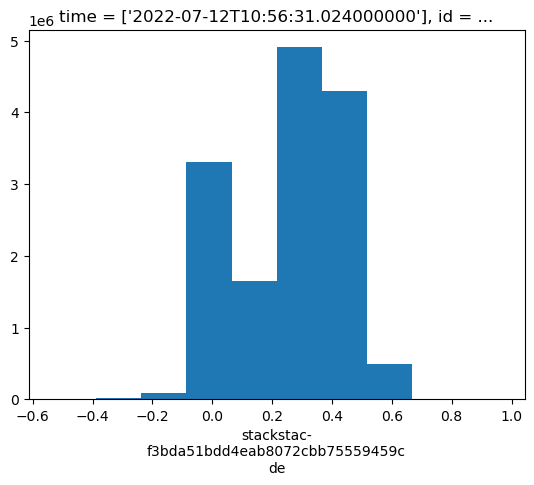

In [36]:
band_swir_before = sub_cube_before.sel(band="B12").astype("float")
band_nir_before = sub_cube_before.sel(band="B08").astype("float")

NBR_before = (band_nir_before - band_swir_before) / (band_nir_before + band_swir_before)# NDWI es tambien un Xarray
NBR_before.plot.hist()

9. Computing a NBR index - AFTER || (NIR - SWIR) / (NIR + SWIR) || (B08 - B12) / (B08 + B12)

(array([1.800000e+01, 6.300000e+01, 2.112730e+05, 7.815240e+05,
        4.478666e+06, 4.052422e+06, 4.351325e+06, 8.858070e+05,
        0.000000e+00, 1.000000e+01]),
 array([-0.70264856, -0.53553757, -0.36842658, -0.20131559, -0.03420459,
         0.1329064 ,  0.30001739,  0.46712839,  0.63423938,  0.80135037,
         0.96846137]),
 <BarContainer object of 10 artists>)

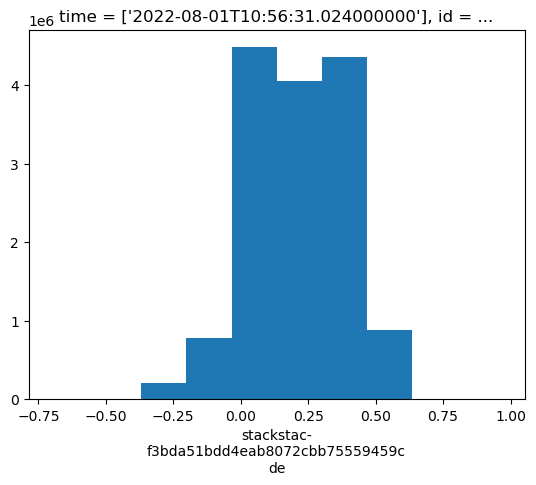

In [35]:
band_swir_after = sub_cube_after.sel(band="B12").astype("float")
band_nir_after = sub_cube_after.sel(band="B08").astype("float")

NBR_after = (band_nir_after - band_swir_after) / (band_nir_after + band_swir_after)# NDWI es tambien un Xarray
NBR_after.plot.hist()

10. Plots in real colors - before and after

time: 5.303354501724243


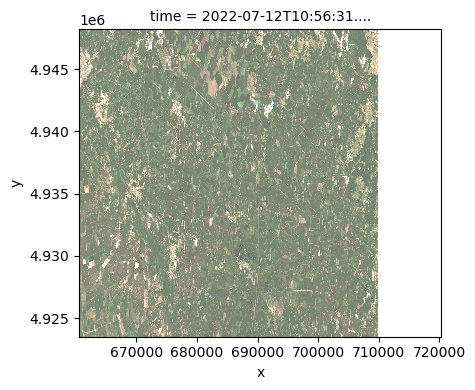

In [43]:
source_before = sub_cube_before.sel(band=["B04", "B03", "B02"])
rgb = source_before[:1]#select 6 days
starttime = time.time()
rgb.plot.imshow(col_wrap=3, col="time", rgb="band", vmax=2500, size=4)
print(f"time: {time.time()-starttime}")

time: 5.499826669692993


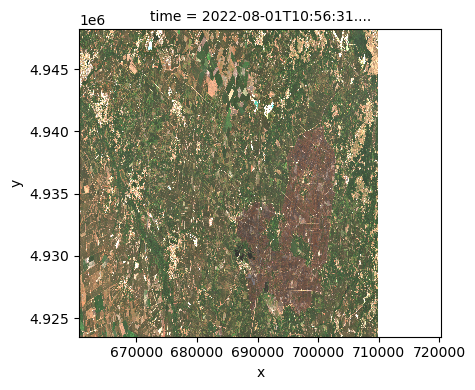

In [38]:
source_after = sub_cube_after.sel(band=["B04", "B03", "B02"])

rgb = source_after[:1]#select 6 days
starttime = time.time() 
rgb.plot.imshow(col_wrap=3, col="time", rgb="band", vmax=2500, size=4)
print(f"time: {time.time()-starttime}")

11. Calculating a NBR plot - before and after

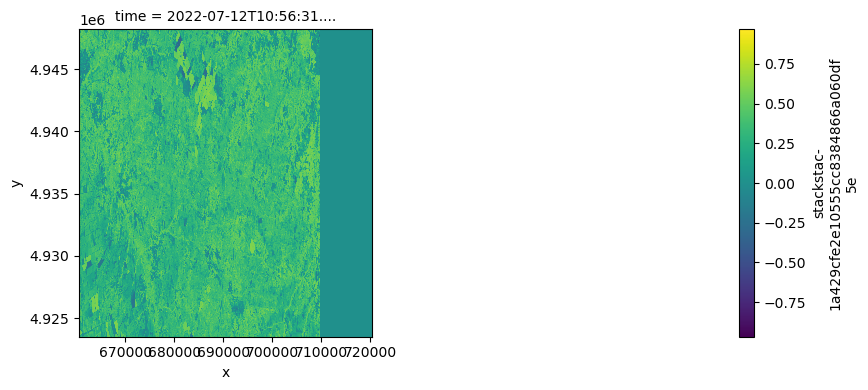

In [14]:
nir, swir = source_before.sel(band="B08").astype('float'), source_before.sel(band="B12").astype('float')
nbr_before = (nir - swir) / (nir + swir)
nbr_plt_before = nbr_before[:1]
nbr_plt_before.plot.imshow(col_wrap=2, col="time", size=4, cmap='viridis')

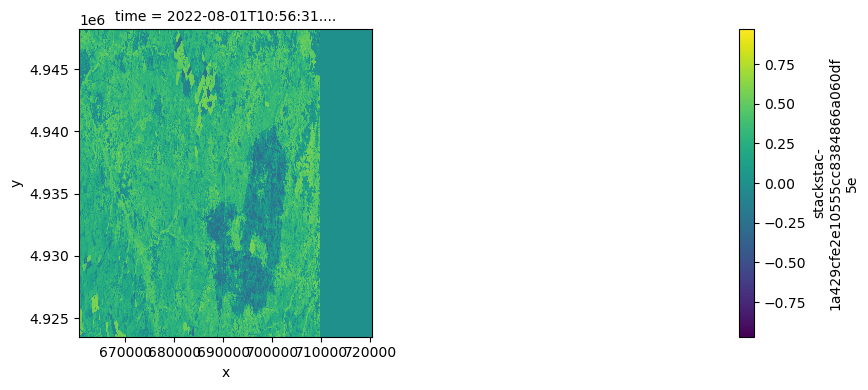

In [15]:
nir, swir = source_after.sel(band="B08").astype('float'), source_after.sel(band="B12").astype('float')
nbr_after = (nir - swir) / (nir + swir)
nbr_plt_after = nbr_after[:1]
nbr_plt_after.plot.imshow(col_wrap=2, col="time", size=4, cmap='viridis')

12. Difference NBR (pre and post fire)

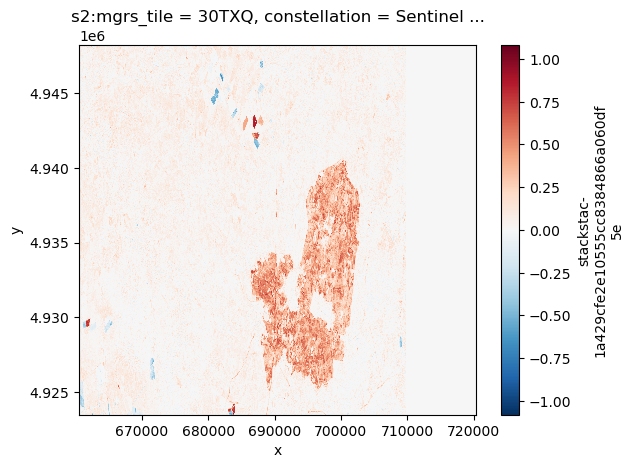

In [16]:
nbr_before, nbr_after = nbr_before.sel(time="2022-07-12T10:56:31.024000000").astype('float'), nbr_after.sel(time="2022-08-01T10:56:31.024000000").astype('float')
nbr_dif = nbr_before-nbr_after
nbr_dif
nbr_dif.plot.imshow()

13. Classifying NBR values

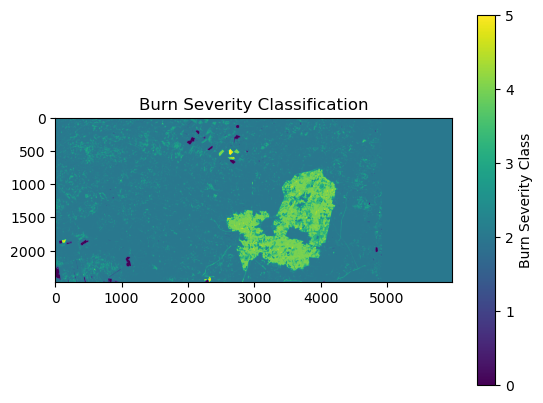

In [17]:
#Define threshold values for different burn severity classes
enhanced_regrowth_threshold = -0.1
unburned_threshold = 0.1
low_severity_threshold = 0.27
moderate_severity_threshold = 0.66

#Classify NBR values
classified_nbr = np.zeros_like(nbr_dif)
classified_nbr[nbr_dif > enhanced_regrowth_threshold] = 1  # Enhanced Regrowth
classified_nbr[(nbr_dif >= -0.1) & (nbr_dif <= unburned_threshold)] = 2  # Unburned
classified_nbr[(nbr_dif > unburned_threshold) & (nbr_dif <= low_severity_threshold)] = 3  # Low Severity
classified_nbr[(nbr_dif > low_severity_threshold) & (nbr_dif <= moderate_severity_threshold)] = 4  # Moderate Severity
classified_nbr[nbr_dif > moderate_severity_threshold] = 5  # High Severity

#Plot the classified NBR values
plt.imshow(classified_nbr, cmap='viridis', vmin=0, vmax=5)
plt.colorbar(label='Burn Severity Class')
plt.title('Burn Severity Classification')
plt.show()

14. Calculation of a burn area

In [18]:
#Calculate pixel area in square meters (assuming spatial resolution is known)
spatial_resolution = 10 
pixel_area_sq_meters = spatial_resolution * spatial_resolution

#Count the number of pixels in classes 3, 4, and 5
pixels_in_classes_345 = np.sum(np.isin(classified_nbr, [3, 4, 5]))

# Calculate burnt area [m2]
burnt_area_sq_meters = pixels_in_classes_345 * pixel_area_sq_meters

#Convert burnt area to hectares
burnt_area_hectares = burnt_area_sq_meters / 10000

print(f'Burnt Area: {burnt_area_hectares:.2f} hectares')

Burnt Area: 21974.47 hectares


15. Importing the land cover map 

In [51]:
import planetary_computer
import pystac_client

# Open the Planetary Computer STAC API
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1/",
    modifier=planetary_computer.sign_inplace,
)
collection = catalog.get_collection("esa-cci-lc")
collection

id: esa-cci-lc
title: ESA Climate Change Initiative Land Cover Maps (Cloud Optimized GeoTIFF)
"description: The ESA Climate Change Initiative (CCI) [Land Cover dataset](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-land-cover?tab=overview) provides consistent global annual land cover maps at 300m spatial resolution from 1992 to 2020. The land cover classes are defined using the United Nations Food and Agriculture Organization's (UN FAO) [Land Cover Classification System](https://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1036361/) (LCCS). In addition to the land cover maps, four quality flags are produced to document the reliability of the classification and change detection. The data in this Collection have been converted from the [original NetCDF data](https://planetarycomputer.microsoft.com/dataset/esa-cci-lc-netcdf) to a set of tiled [Cloud Optimized GeoTIFFs](https://www.cogeo.org/) (COGs)."
"providers: VITO (licensor): Provides the PROBA-V source data (for v2.0). UCLouvain (producer): UCLouvain produces the dataset (v2.1) for the ESA Climate Change Initiative. Brockmann Consult (processor): Brockmann Consult is responsible for the required pre-processing and the distribution of the dataset (v2.1). ESA Climate Change Initiative (licensor): The ESA Climate Change Initiative (CCI) is leading the product creation. Copernicus (licensor): Hosts the data on the Copernicus Climate Data Store (CDS). Microsoft (processor, host)"
type: Collection
sci:doi: 10.24381/cds.006f2c9a
msft:group_id: esa-cci-lc
msft:container: esa-cci-lc
msft:storage_account: landcoverdata
msft:short_description: Tiled ESA CCI global land cover maps in COG format
msft:region: westeurope


In [52]:
# Bounding box expressed in Lat/Lon
aoi_bounds = (-1.362991,44.412202,-0.911865,44.674024)

In [53]:
search = catalog.search(
    collections=collection,
    datetime=f'{start_date}/{end_date}',
    bbox=aoi
)
items2 = search.item_collection()
print(f"{len(items)} items found with the `bbox` parameter")

9 items found with the `bbox` parameter


In [54]:
for img in items2:
    print(img.id, img.datetime)

In [55]:
veg_type = catalog.get_collection('esa-cci-lc').get_item("C3S-LC-L4-LCCS-Map-300m-P1Y-2020-v2.1.1-N00W045")
veg_type

id: C3S-LC-L4-LCCS-Map-300m-P1Y-2020-v2.1.1-N00W045
"bbox: [-45.0, 0.0, 0.0, 45.00000000000001]"
"title: ESA CCI Land Cover Map for Year 2020, Tile N00W045"
created: 2023-01-11T23:08:36.129624Z
datetime: None
proj:epsg: 4326
"proj:shape: [16200, 16200]"
end_datetime: 2020-12-31T23:59:59Z
"proj:transform: [0.002777777777777778, 0.0, -45.0, 0.0, -0.0027777777777777783, 45.00000000000001]"
start_datetime: 2020-01-01T00:00:00Z
esa_cci_lc:tile: N00W045


In [24]:
epsg_val = array["proj:epsg"]
epsg_val = int(epsg_val.to_numpy())

In [56]:
array_veg = stackstac.stack(
    veg_type,
    assets = ["lccs_class"],
    epsg=epsg_val,
    resolution=10,
    bounds_latlon=[-0.9750285970655596,44.44689686136784,-0.23070492986833424,44.653393290190074],
)
array_veg

/srv/conda/envs/notebook/lib/python3.11/site-packages/stackstac/prepare.py:363: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-ea7793e440493b82431bd66e2e2c16eb' (time: 1,
                                                                band: 1,
                                                                y: 2468, x: 5981)>
dask.array<fetch_raster_window, shape=(1, 1, 2468, 5981), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/17)
  * time                (time) datetime64[ns] NaT
    id                  (time) <U47 'C3S-LC-L4-LCCS-Map-300m-P1Y-2020-v2.1.1-...
  * band                (band) <U10 'lccs_class'
  * x                   (x) float64 6.606e+05 6.606e+05 ... 7.203e+05 7.204e+05
  * y                   (y) float64 4.948e+06 4.948e+06 ... 4.924e+06 4.924e+06
    esa_cci_lc:tile     <U7 'N00W045'
    ...                  ...
    title               <U64 'Land Cover Class Defined in the Land Cover Clas...
    end_datetime        <U20 '2020-12-31T23:59:59Z'
    start_datetime      <U20 '2020-01-01T00:00:00Z'
    description         <U145 'Land cover class per pixel, defined using the ...
    raster:bands        object {'nodata': 0, 'sampling': 'area', 'data_type':...
    epsg                int64 32630
Attributes:
    spec:        RasterSpec(epsg=32630, bounds=(660550, 4923500, 720360, 4948...
    crs:         epsg:32630
    transform:   | 10.00, 0.00, 660550.00|\n| 0.00,-10.00, 4948180.00|\n| 0.0...
    resolution:  10

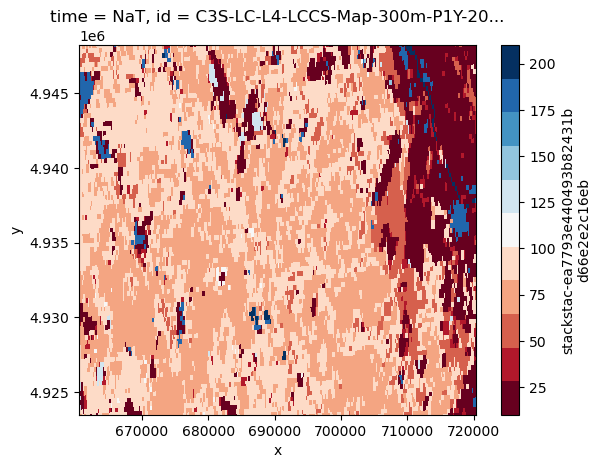

In [57]:
array_veg
cmap=plt.get_cmap('RdBu',11)
array_veg.squeeze().plot(cmap=cmap)
